In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings

In [2]:
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
#let's make a copy of files 
train_original=train.copy() 
test_original=test.copy()

In [4]:
train.head()
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [5]:
print(train.columns)
print(test.columns)

Index(['ID', 'Datetime', 'Count'], dtype='object')
Index(['ID', 'Datetime'], dtype='object')


In [6]:
print(train.dtypes)
print(test.dtypes)

ID           int64
Datetime    object
Count        int64
dtype: object
ID           int64
Datetime    object
dtype: object


In [7]:
print(train.shape)
print(test.shape)

(18288, 3)
(5112, 2)


In [8]:
#change the datetime datatype from object to datetime format
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [9]:
print(train.dtypes)
print(test.dtypes)

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object
ID                   int64
Datetime    datetime64[ns]
dtype: object


In [10]:
#Hypothesis on year,day,month,hours ,count of passangers
for i in (train,test,train_original,test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [11]:
train.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [12]:
#lets make a weekend variable to see impact of weekend 
train['day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']

In [13]:
train.head(10)

,ID,Datetime,Count,year,month,day,hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5
5,5,2012-08-25 05:00:00,2,2012,8,25,5,5
6,6,2012-08-25 06:00:00,2,2012,8,25,6,5
7,7,2012-08-25 07:00:00,2,2012,8,25,7,5
8,8,2012-08-25 08:00:00,6,2012,8,25,8,5
9,9,2012-08-25 09:00:00,2,2012,8,25,9,5


In [14]:
#lets assign 1 if day of week is weekend else 0
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6 :
        return 1
    else:
        return 0

In [15]:
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

In [16]:
train.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [17]:
#let's plot time series plot
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']

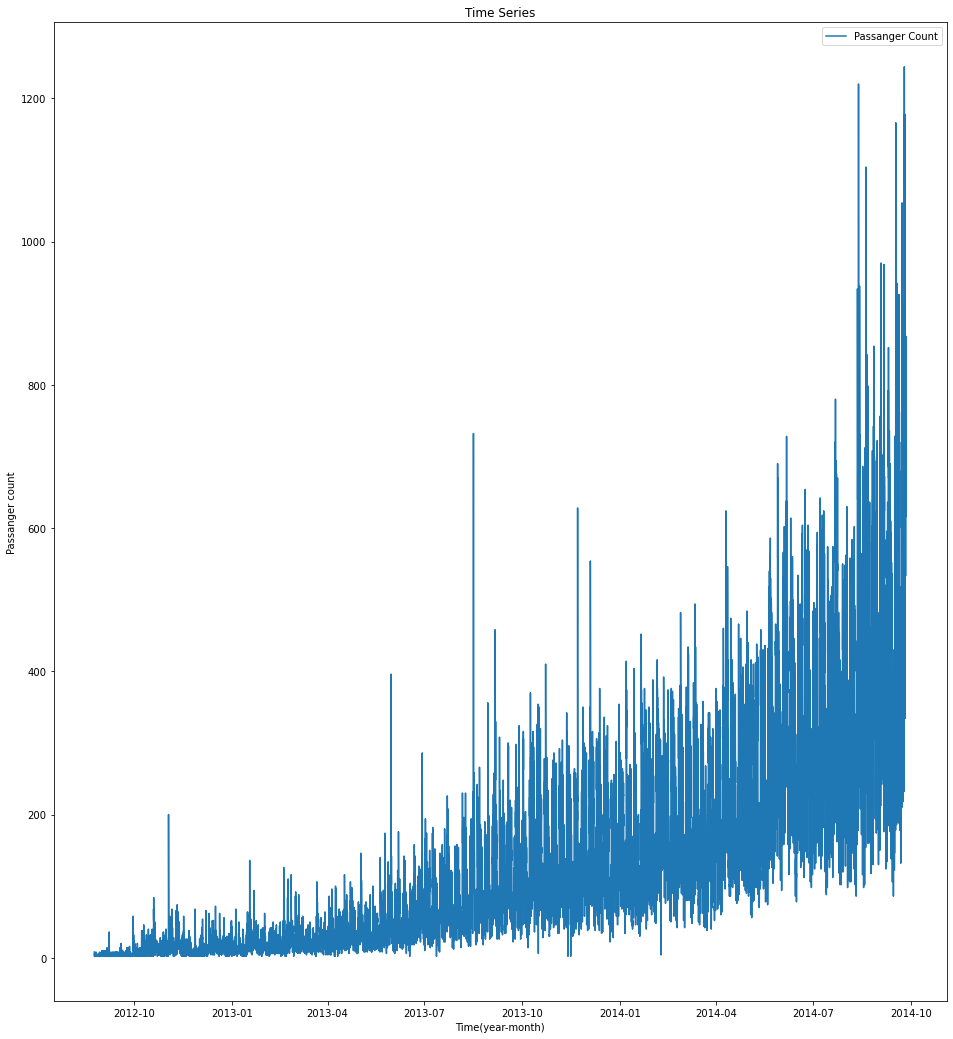

In [18]:
plt.figure(figsize=(16,18))
plt.plot(ts,label = 'Passanger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passanger count')
plt.legend(loc='best')
#Here we can infer that there is a increase in trend with a year and month

##### Let's look at  out 1st Hypothesis- year wise traffic count 

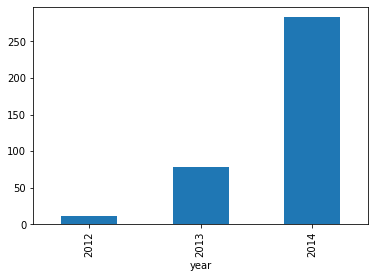

In [19]:
train.groupby('year')['Count'].mean().plot.bar()
#we can see there's increase in count as year passes which validates our first hypothesis

##### 2nd Hypothesis traffic will be more from month may to october

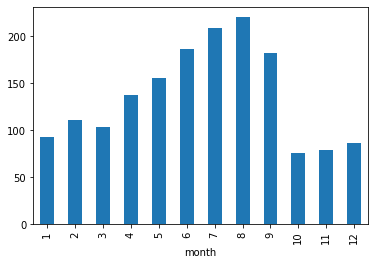

In [20]:
train.groupby('month')['Count'].mean().plot.bar()
#Here we see decresing count for last 3 months,so let's see by monthly mean yearwise

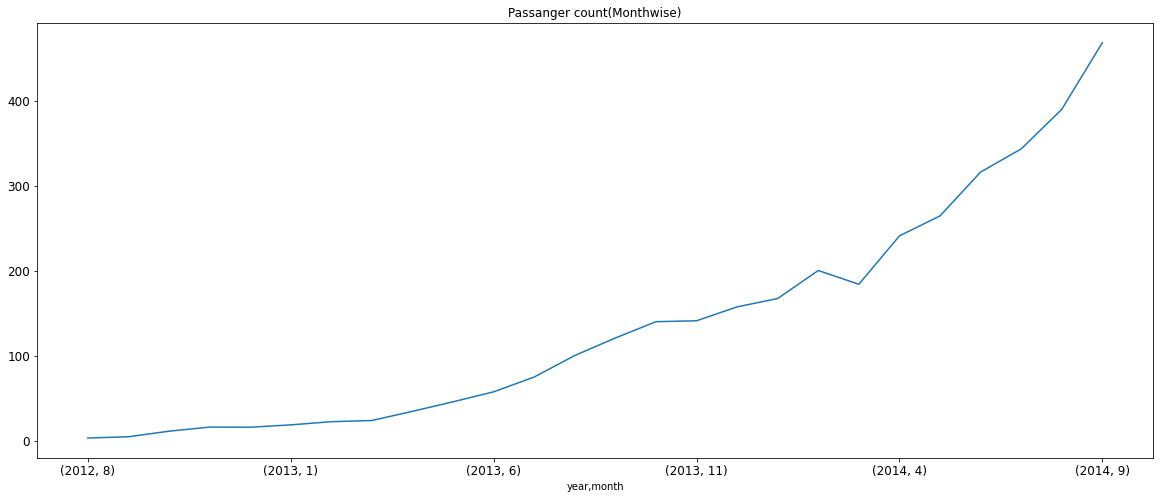

In [21]:
temp = train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(20,8),title='Passanger count(Monthwise)',fontsize = 12)
#we can see increasing trend

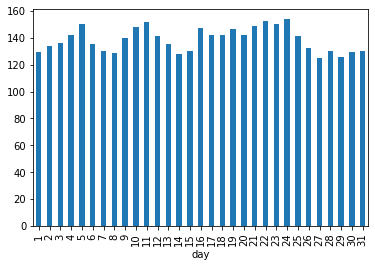

In [22]:
#Let's look daily mean of passanger count
train.groupby('day')['Count'].mean().plot.bar()

#### We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

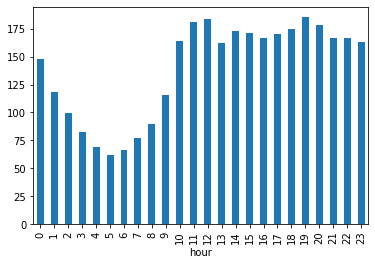

In [23]:
train.groupby('hour')['Count'].mean().plot.bar()

#### It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

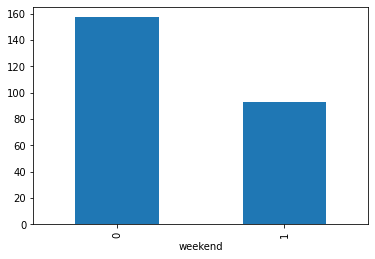

In [24]:
#let's look at weekends count 
train.groupby('weekend')['Count'].mean().plot.bar()

#### we can infer that traffic is more in weekdays compared to weekend

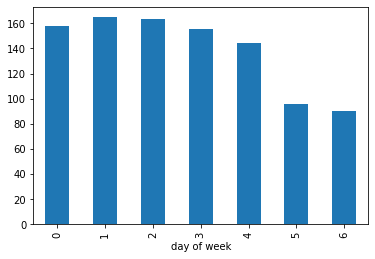

In [25]:
# let's look for weekdays count
train.groupby('day of week')['Count'].mean().plot.bar()

#### we can infer that traffic count is more compared to Saturday and Sunday

In [26]:
# we'll drop ID column that it has no effect on 
train = train.drop('ID',1)
train.head()

,Datetime,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


#### As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn

In [27]:
train.Timestamp = pd.to_datetime(train.Datetime,format = '%d-%m-%Y %H:%M')
train.index = train.Timestamp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [28]:
#Hourly Time-Series
hourly = train.resample('H').mean()
hourly

,Count,year,month,day,hour,day of week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,702,2014,9,25,21,3,0


In [29]:
#converting to daily mean
daily = train.resample('D').mean()
#converting to weekly mean
weekly = train.resample('W').mean()
#converting to monthly mean
monthly = train.resample('M').mean()

#### Let's look at hourly,daily,weekly,monthly time series

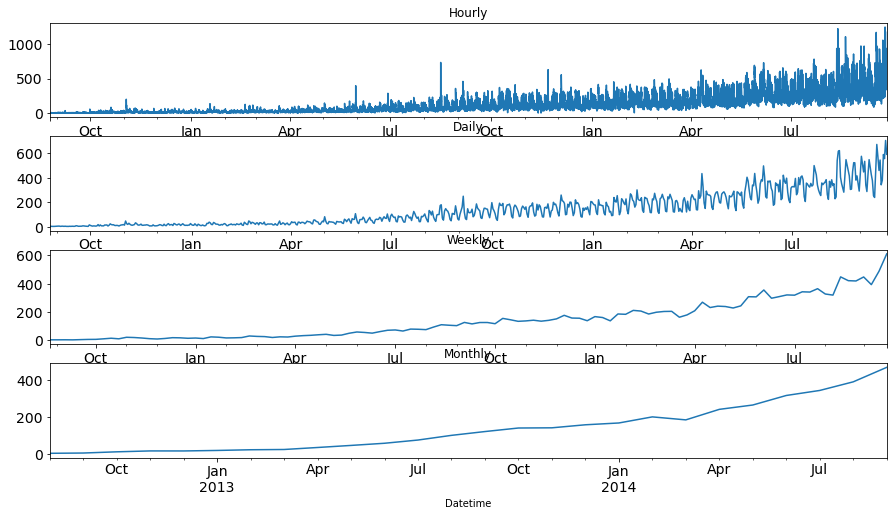

In [30]:
fig,axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

In [31]:
test.Timestamp = pd.to_datetime(test.Datetime,format = '%d-%m-%Y %H:%M' )
test.index = test.Timestamp

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [32]:
#converting to daily mean
test = test.resample('D').mean()

In [33]:
train.Timestamp = pd.to_datetime(train.Datetime,format = '%d-%m-%Y %H:%M' )
train.index = train.Timestamp
#converting to daily mean
train = train.resample('D').mean()

## Modeling Techniques and Evaluation

##To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [34]:
Train = train.loc['2012-08-25' : '2014-06-24']
valid = train.loc['2014-06-25' : '2014-09-25']

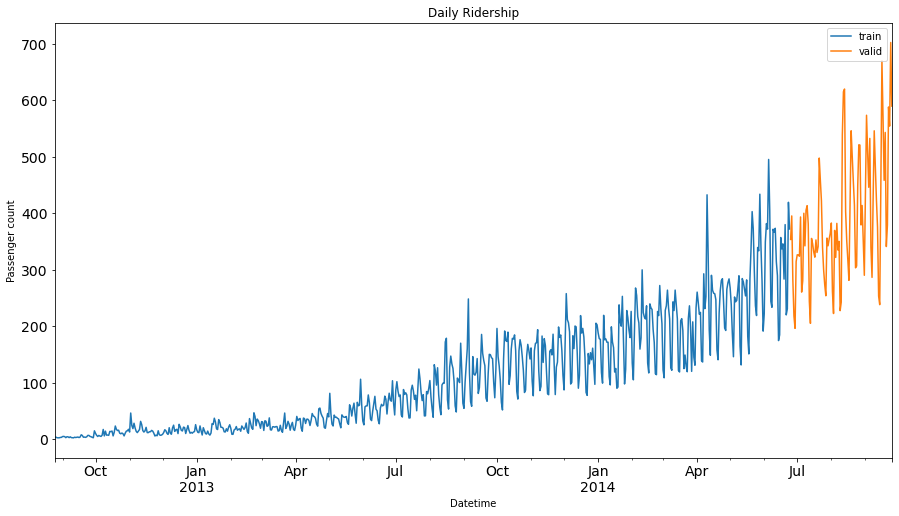

In [35]:
#Now we will look at how the train and validation part has been divided.
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count")
plt.legend(loc='best') 
plt.show()

## Let's use Niave Approach to predict

In [36]:
dd = np.asarray(Train.Count)

In [37]:
y_hat = valid.copy()

In [38]:
y_hat['naive'] = dd[len(dd)-1]

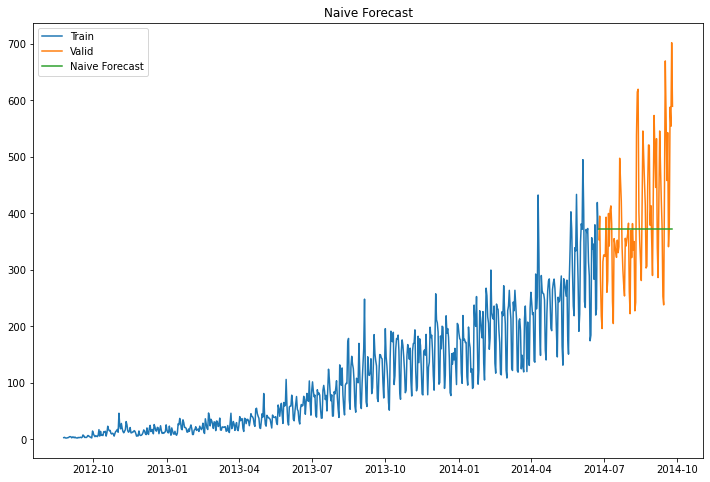

In [39]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()


In [40]:
#we'll calculate rmse to see how accuarate our model
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(valid.Count,y_hat.naive))

In [41]:
print(rmse)

111.79050467496724


## Moving Average Technique

In [ ]:
#Let's take avg of last few points insted of all

In [42]:
y_hat_avg = valid.copy()
y_hat_avg['Moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] #taking avg of last 10 observations

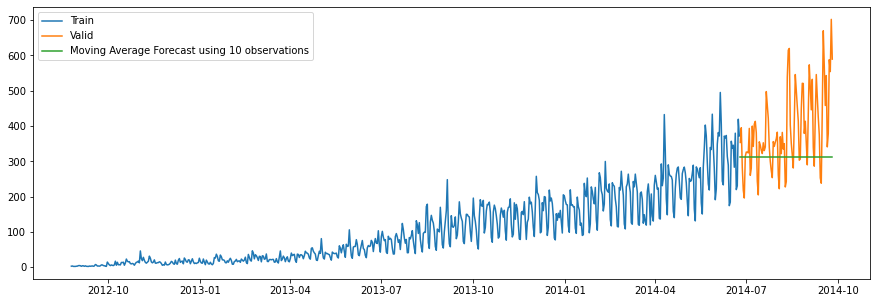

In [43]:
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show()

In [44]:
y_hat_avg = valid.copy()
y_hat_avg['Moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] #taking avg of last 20 observations

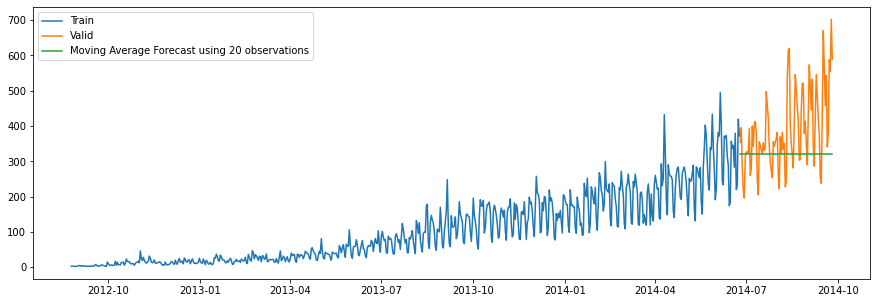

In [45]:
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show()

In [46]:
y_hat_avg = valid.copy()
y_hat_avg['Moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] #taking avg of last 50 observations

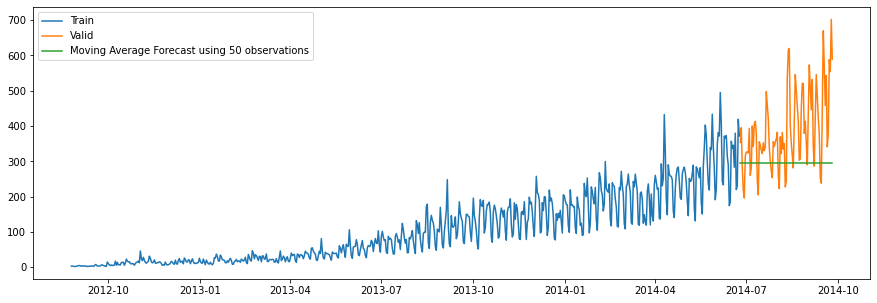

In [47]:
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [48]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.Moving_avg_forecast))
print(rms)

144.19175679986802


## Simple Exponential Smoothing Technique

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [50]:
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level =0.6,optimized = False)

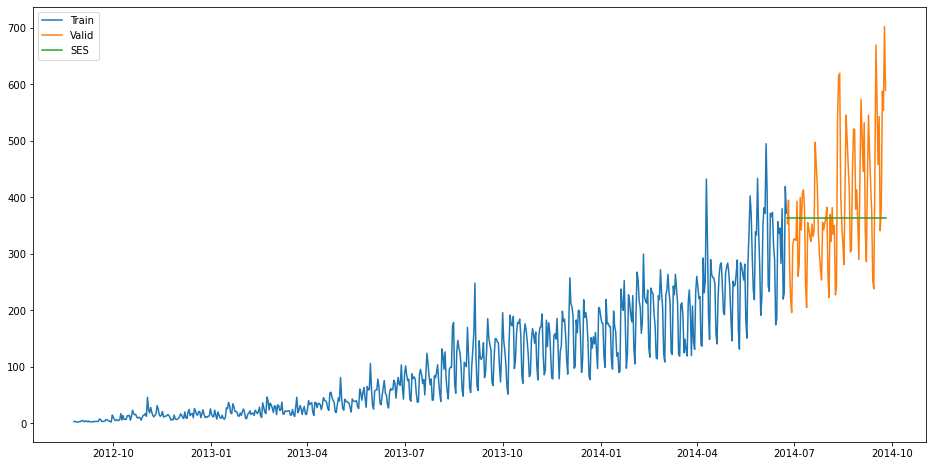

In [51]:
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best')
plt.show()

In [52]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.SES))
print(rms)

113.43708111884514


## Holt's Linear Trend Model

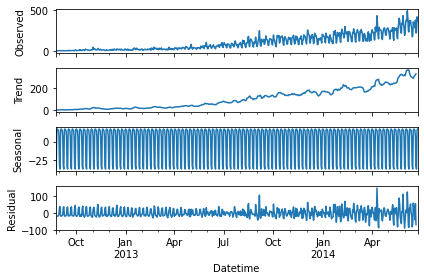

In [53]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()
# we can see increasing trend

In [54]:
#lets make a model on Trend
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

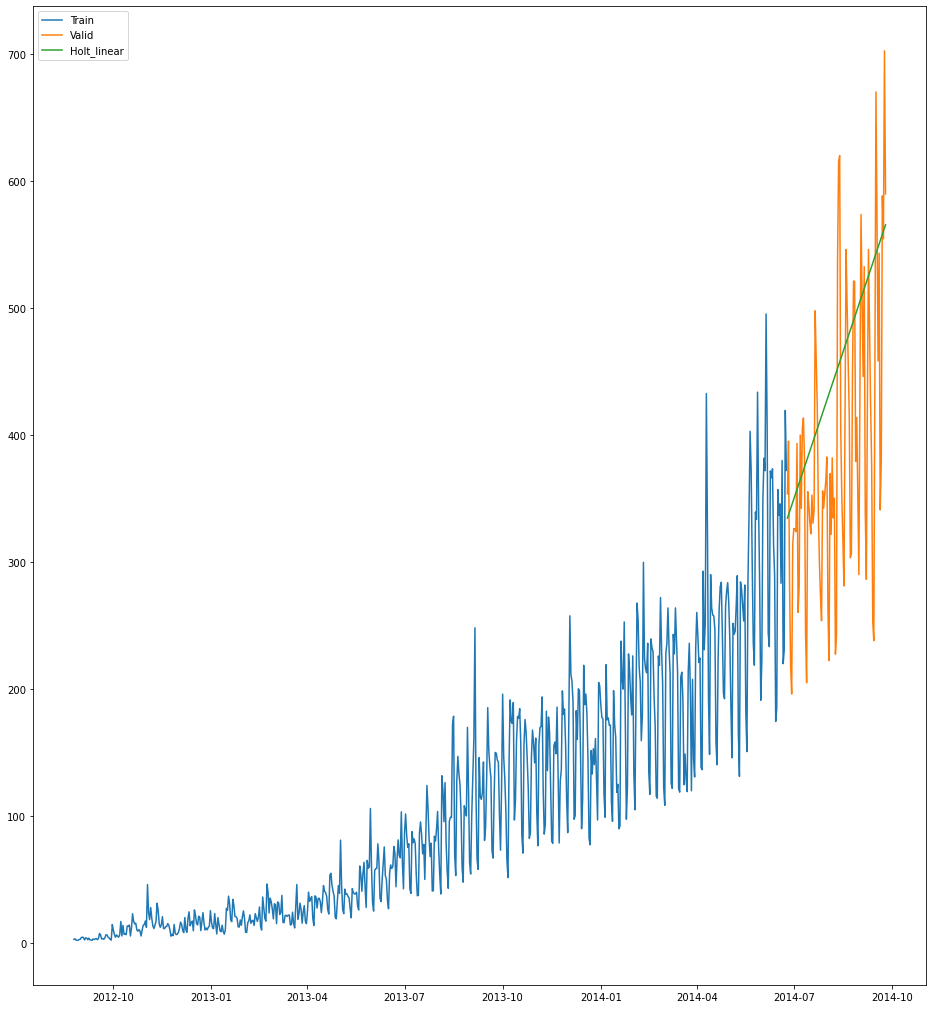

In [55]:
plt.figure(figsize=(16,18))
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [56]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


## Holt's Linear Trend Model on Daily Time Series

1) Now let’s try to make holt’s linear trend model on the daily time series and make predictions on the test dataset.
2) We will make predictions based on the daily time series and then will distribute that daily prediction to hourly predictions.
3) We have fitted the holt’s linear trend model on the train dataset and validated it using validation dataset.

In [57]:
#let's make prediction for the test data set
predict = fit1.forecast(len(test))

In [58]:
# save this predicted values in test dataset
test['prediction'] = predict

Remember this is the daily predictions. We have to convert these predictions to hourly basis. * To do so we will first calculate the ratio of passenger count for each hour of every day. * Then we will find the average ratio of passenger count for every hour and we will get 24 ratios. * Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

In [59]:
#calculating the hourly ratio count
train_original['ratio'] = train_original['Count']/train_original['Count'].sum()

In [60]:
train_original.columns

Index(['ID', 'Datetime', 'Count', 'year', 'month', 'day', 'hour', 'ratio'], dtype='object')

In [61]:
#grouping the hourly ratio
temp = train_original.groupby(['hour'])['ratio'].sum()

In [62]:
#let's save this as csv by group
pd.DataFrame(temp,columns=['hour','ratio']).to_csv('GROUPby.csv')

In [63]:
temp2 = pd.read_csv("GROUPby.csv")
temp2 = temp2.drop('hour.1',1)

In [64]:
# merge test and original_test on day,month,year
merge = pd.merge(test,test_original,on=('day','month','year'),how='left')
merge['hour'] = merge['hour_y']

In [65]:
merge = merge.drop(['year', 'month', 'Datetime','hour_x','hour_y'],axis=1)

In [66]:
#predicting by merging merge and temp2
prediction = pd.merge(merge,temp2,on='hour',how = 'left')

In [67]:
prediction

,ID_x,day,prediction,ID_y,hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802
...,...,...,...,...,...,...
5107,23387.5,26.0,866.398583,23395,19,0.055627
5108,23387.5,26.0,866.398583,23396,20,0.053455
5109,23387.5,26.0,866.398583,23397,21,0.049895
5110,23387.5,26.0,866.398583,23398,22,0.050076


In [68]:
# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']

In [69]:
# Now let's load the submission file
submission = pd.read_csv("submission.csv")
submission.columns

Index(['ID', 'Count'], dtype='object')

In [70]:
#now let s drop the features other than ID and Count
submission = prediction.drop(['ID_x','day','ID_y','prediction','hour','ratio'],axis=1)

In [71]:
#converting the final submission to csv format
pd.DataFrame(submission,columns=['ID','Count']).to_csv('Holt linear.csv',index=False)

## Holt's Winter Model

In [72]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']),seasonal_periods=7,trend='add',seasonal='add',).fit()

In [73]:
y_hat_avg['Holt_winter'] = fit1.forecast(len(valid))

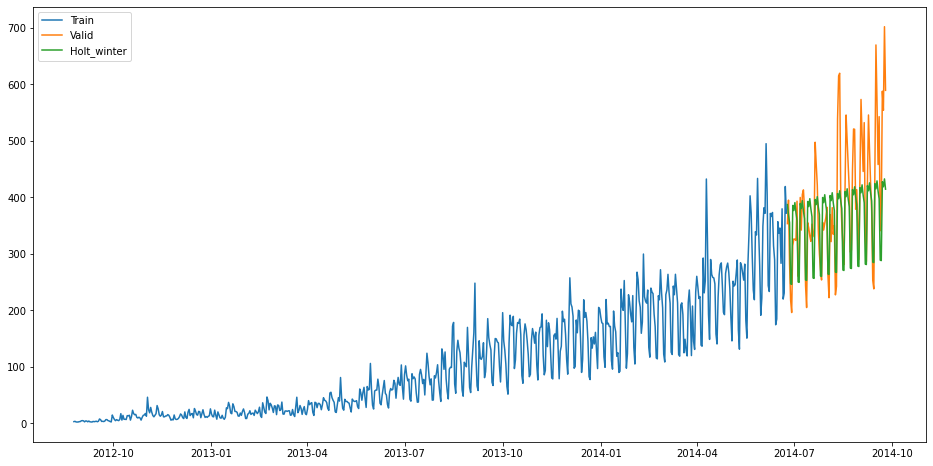

In [74]:
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_winter'], label='Holt_winter')
plt.legend(loc='best')
plt.show()

In [77]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_winter))
rms

82.34683404090167

In [78]:
#we can see reduced rms value let's forecast on whole test dat set
predict = fit1.forecast(len(test))

In [79]:
# save this predicted values in test dataset
test['prediction'] = predict

In [80]:
# merge test and original_test on day,month,year
merge = pd.merge(test,test_original,on=('day','month','year'),how='left')
merge['hour'] = merge['hour_y']

In [81]:
merge = merge.drop(['year', 'month', 'Datetime','hour_x','hour_y'],axis=1)

In [82]:
#predicting by merging merge and temp2
prediction = pd.merge(merge,temp2,on='hour',how = 'left')

In [83]:
# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24 
prediction['ID']=prediction['ID_y']

In [84]:
#now let s drop the features other than ID and Count
prediction['ID'] = prediction['ID_y']
submission = prediction.drop(['ID_x','day','ID_y','prediction','hour','ratio'],axis=1)

In [85]:
#converting the final submission to csv format
pd.DataFrame(submission,columns=['ID','Count']).to_csv('Holt winter.csv',index=False)

## Arima Model

In [103]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(train_original):
        #Determing rolling statistics
    rolmean = train_original.rolling(24).mean() # 24 hours on each day
    rolstd = train_original.rolling(24).std()
        #Plot rolling statistics:
    orig = plt.plot(train_original, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(train_original, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

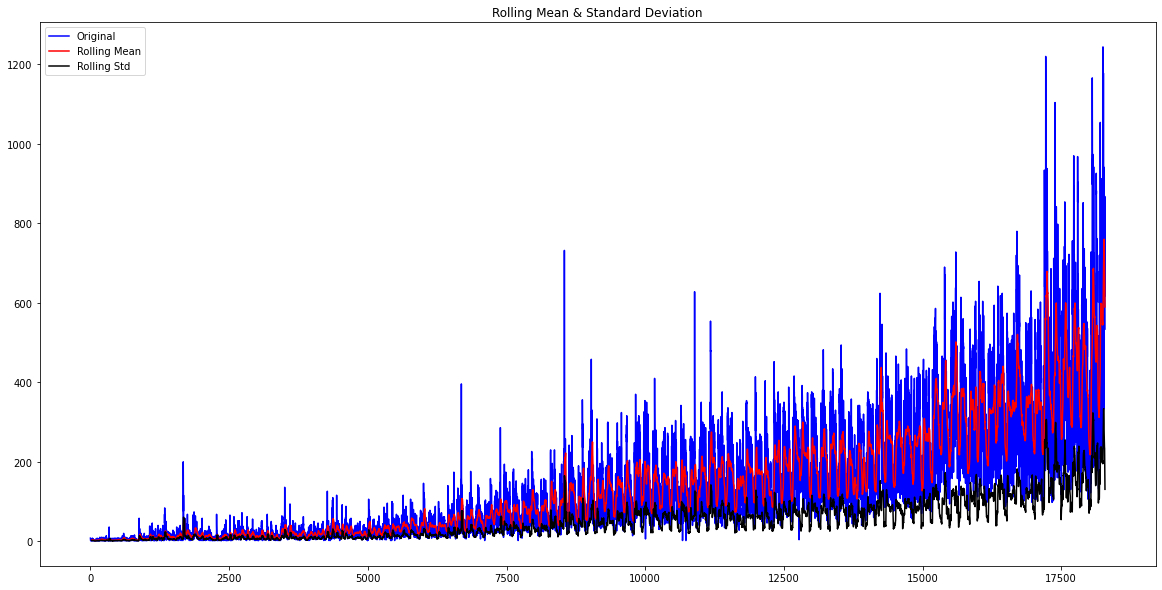

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [104]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

test_stationarity(train_original['Count'])